# Part I

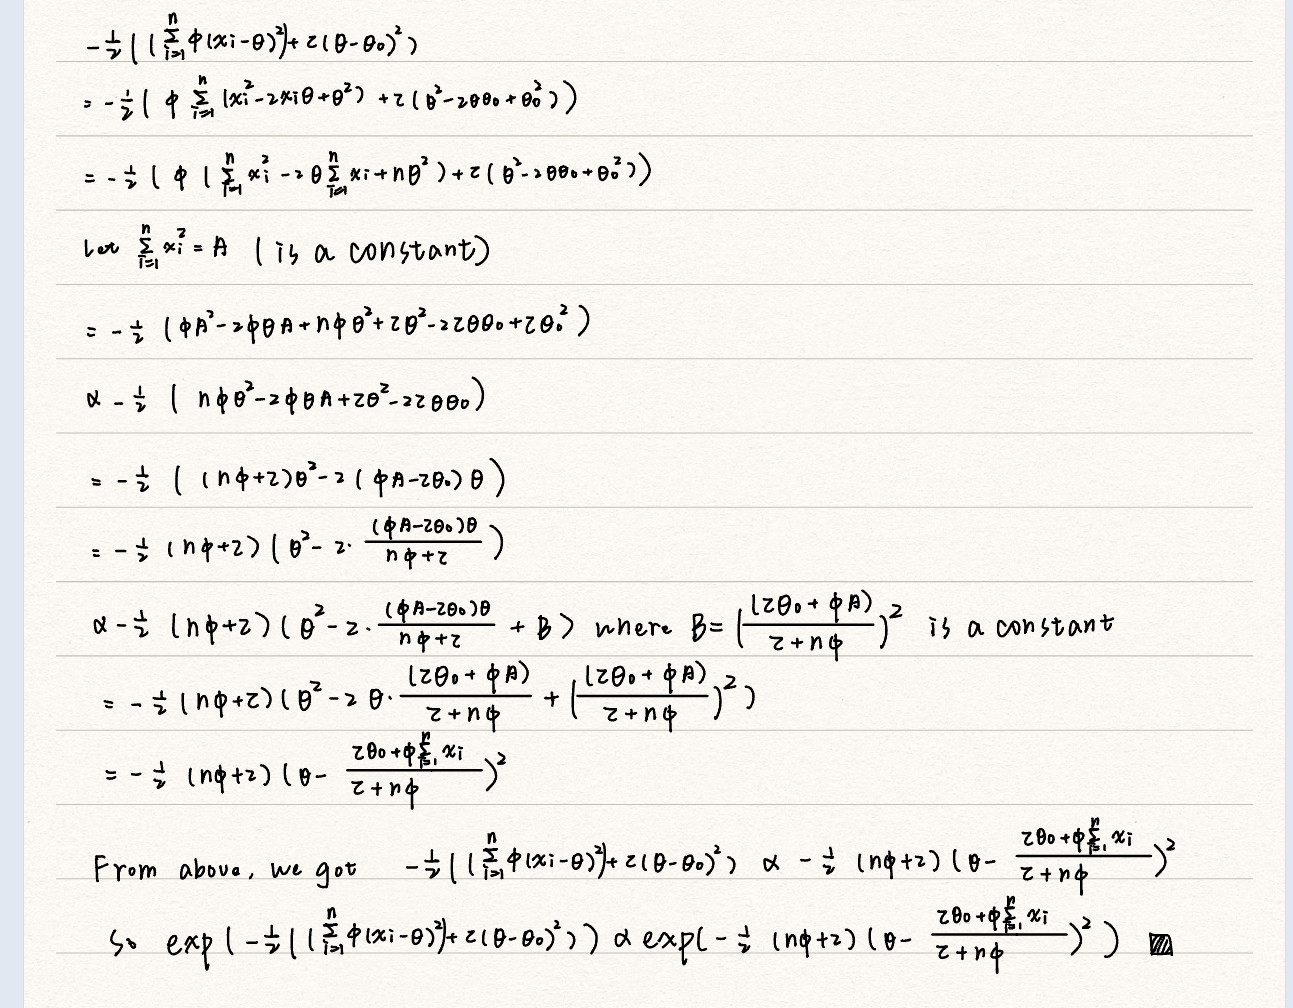

# Part II

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Question1

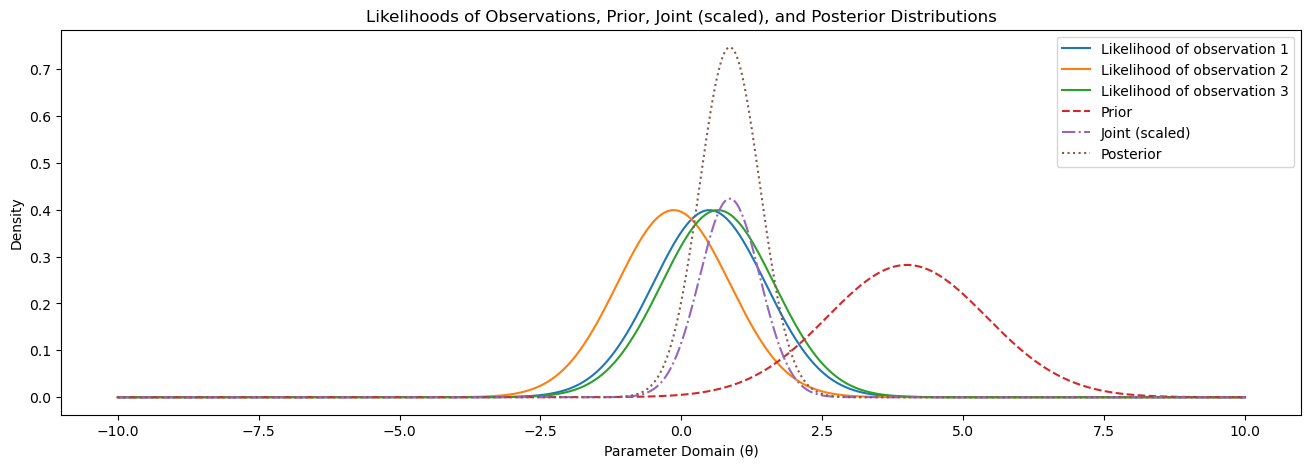

In [13]:
np.random.seed(42)
n = 3  
x = stats.norm(loc=0, scale=1).rvs(n)  
theta_0, tau = 4, 1/2  
parameter_domain = np.linspace(-10, 10, 1001)  

# Calculate the likelihood for each observation
likelihoods = [stats.norm.pdf(parameter_domain, loc=obs, scale=1) for obs in x]

# Calculate the prior distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Calculate the joint distribution as the product of the likelihoods and prior
joint = prior.copy()
for likelihood in likelihoods:
    joint *= likelihood
joint *= 500  

# Calculate the posterior distribution
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

# Plot the results
plt.figure(figsize=(16, 5))

# Plot each individual likelihood
for i, likelihood in enumerate(likelihoods, 1):
    plt.plot(parameter_domain, likelihood, label=f"Likelihood of observation {i}")

# Plot the prior, joint (scaled for visualization), and posterior distributions
plt.plot(parameter_domain, prior, label="Prior", linestyle='--')
plt.plot(parameter_domain, joint, label="Joint (scaled)", linestyle='-.')
plt.plot(parameter_domain, posterior, label="Posterior", linestyle=':')

# Add labels and legend
plt.title("Likelihoods of Observations, Prior, Joint (scaled), and Posterior Distributions")
plt.xlabel("Parameter Domain (θ)")
plt.ylabel("Density")
plt.legend()
plt.show()


# Question 2

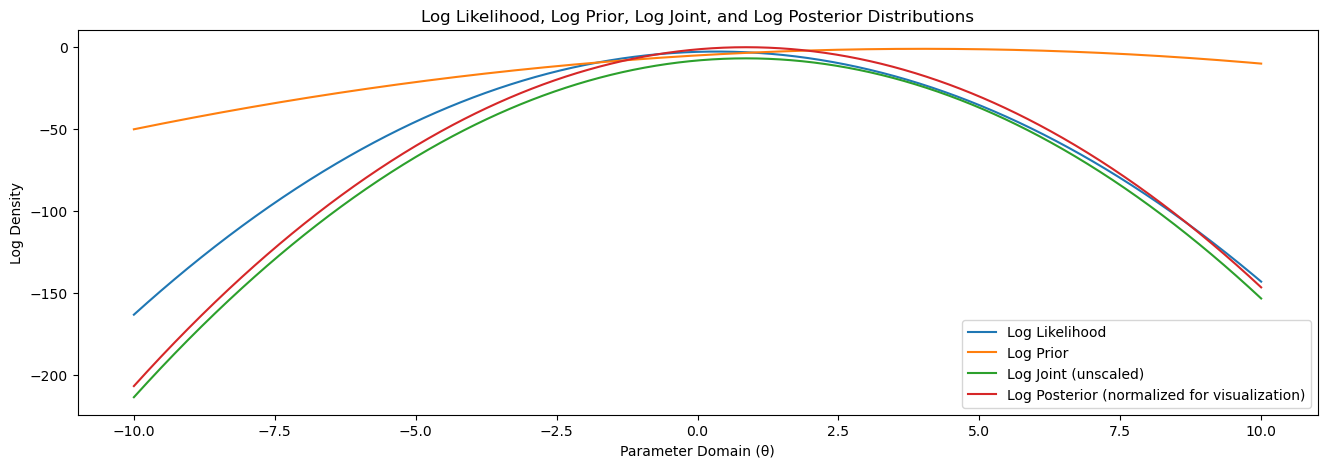

In [14]:
np.random.seed(42)
# Calculate the log likelihood for each observation and sum them to get the total log likelihood
log_likelihood = sum(stats.norm.logpdf(parameter_domain, loc=obs, scale=1) for obs in x)

# Calculate the log prior distribution
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

# Calculate the log joint distribution as the sum of the log likelihood and log prior
log_joint = log_likelihood + log_prior

# Since the posterior is derived from the likelihood and prior, its log is also the sum of their logs.
log_posterior = np.log(posterior)

# Plot the log likelihood, log prior, and log joint distributions
plt.figure(figsize=(16, 5))

plt.plot(parameter_domain, log_likelihood, label="Log Likelihood")
plt.plot(parameter_domain, log_prior, label="Log Prior")
plt.plot(parameter_domain, log_joint, label="Log Joint (unscaled)")
plt.plot(parameter_domain, log_posterior, label="Log Posterior (normalized for visualization)")

# Add labels and legend
plt.title("Log Likelihood, Log Prior, Log Joint, and Log Posterior Distributions")
plt.xlabel("Parameter Domain (θ)")
plt.ylabel("Log Density")
plt.legend()
plt.show()

# Question 3

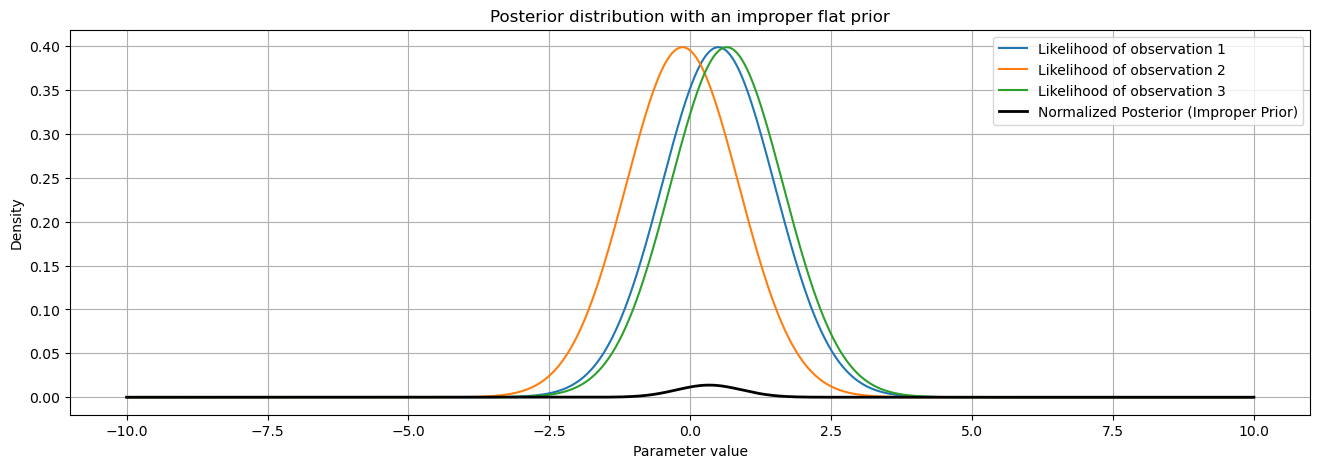

In [15]:
np.random.seed(42)
n = 3  
x = stats.norm(loc=0, scale=1).rvs(n)  
theta_0, tau = 4, 1/2  
parameter_domain = np.linspace(-10, 10, 1001) 

# The flat prior is a constant, so we'll just set it to 1 for all θ.
# Although this is not normalizable, we use it here for demonstration purposes.
flat_prior = np.ones_like(parameter_domain)

# The likelihood of each observation given θ
likelihoods = stats.norm.pdf(x[:, None], loc=parameter_domain, scale=1)  # assuming known sigma=1

# Since the prior is flat (and improper), the posterior is proportional to the likelihood
improper_posterior = likelihoods.prod(axis=0)
improper_posterior_normalized = improper_posterior / improper_posterior.sum()

plt.figure(figsize=(16, 5))

# Plot each individual likelihood
for i, l in enumerate(likelihoods):
    plt.plot(parameter_domain, l, label=f"Likelihood of observation {i+1}")

plt.plot(parameter_domain, improper_posterior_normalized, label="Normalized Posterior (Improper Prior)", color='black', linewidth=2)

plt.legend()
plt.title("Posterior distribution with an improper flat prior")
plt.xlabel("Parameter value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

The posterior distribution for a likelihood that is normal and a prior that is proportional to 1 (which is an improper prior because it does not integrate to 1) can still result in a proper posterior in certain cases. In this specific case, even though the prior is improper, the conjugacy of the normal likelihood with a normal prior leads to a proper normal posterior distribution. 

[The posterior distribution is obtained by updating our beliefs about the parameter $\theta$ in light of the observed data. The resulting posterior distribution will have a mean that is a weighted average of the observed data and the prior mean (if the prior were proper), and its variance will be dependent on both the variance of the prior (which is infinite for a flat prior) and the variance of the likelihood function.]

# Question 4

Log likelihoods represent the log of the probability of the observed data given the parameters, without considering any prior beliefs about the parameters. Posterior distributions, on the other hand, represent our updated beliefs about the parameters after observing the data, and they incorporate the prior distribution. 

So, the log likelihood itself is not affected by the choice of prior, improper or not. The log likelihood is a function of the data given the parameters, and it reflects how well the model explains the observed data without considering the prior beliefs about the parameters.

However, the posterior distribution, which combines the prior with the likelihood, can be significantly affected by the choice of prior. In the case of an improper prior, which doesn't integrate to 1, the posterior may not be a proper probability distribution unless it is normalized appropriately. This is where the marginal likelihood constants come in — they are used to ensure that the posterior is a proper distribution by making it integrate to 1.

In the specific case where the likelihood is normal and the prior is a improper prior that constants over all parameter values, the resulting posterior is a proper normal distribution. This is due to the conjugate nature of the normal-normal model, where the normal likelihood and the normal prior combine to give a normal posterior. The normalization constant needed to turn the improper prior into a proper posterior can often be found analytically due to the conjugate nature of the prior and likelihood.

In summary, the log likelihood remains unchanged regardless of the prior used. The posterior needs adjustment when an improper prior is used, to ensure that it becomes a proper distribution.